In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import inaugural, stopwords

# Unit 4 Capstone:
## Exploration Supervised and Unsupervised Learning for NLP 

In this capstone, we'll dig into a corpus of Inauguration addresses with the goal of classifying the texts using a combination of supervised and unsupervised learning techniques.  The corpus comes from nltk and contains 52 Presidents Inaugural addresses from Washington to Trump the US presidents ). 

__Sections:__

[Text Processing](#section1)<br>
[Unsupervised Feature Generation](#section2)<br>
[Supervised Learning Models](#section3)<br>
[Comparing Supervised and Unsupervised Learning for NLP Applications](#section4)

## Importing Text

In [2]:
import os
import nltk.corpus
print(os.listdir(nltk.data.find("corpora")))

['abc', 'abc.zip', 'alpino', 'alpino.zip', 'biocreative_ppi', 'biocreative_ppi.zip', 'brown', 'brown.zip', 'brown_tei', 'brown_tei.zip', 'cess_cat', 'cess_cat.zip', 'cess_esp', 'cess_esp.zip', 'chat80', 'chat80.zip', 'city_database', 'city_database.zip', 'cmudict', 'cmudict.zip', 'comparative_sentences', 'comparative_sentences.zip', 'comtrans.zip', 'conll2000', 'conll2000.zip', 'conll2002', 'conll2002.zip', 'conll2007.zip', 'crubadan', 'crubadan.zip', 'dependency_treebank', 'dependency_treebank.zip', 'dolch', 'dolch.zip', 'europarl_raw', 'europarl_raw.zip', 'floresta', 'floresta.zip', 'framenet_v15', 'framenet_v15.zip', 'framenet_v17', 'framenet_v17.zip', 'gazetteers', 'gazetteers.zip', 'genesis', 'genesis.zip', 'gutenberg', 'gutenberg.zip', 'ieer', 'ieer.zip', 'inaugural', 'inaugural.zip', 'indian', 'indian.zip', 'jeita.zip', 'kimmo', 'kimmo.zip', 'knbc.zip', 'lin_thesaurus', 'lin_thesaurus.zip', 'machado.zip', 'mac_morpho', 'mac_morpho.zip', 'masc_tagged.zip', 'movie_reviews', 'movie

In [3]:
len(nltk.corpus.inaugural.fileids())

58

<a id='section1'></a>
## Text Processing

The first step is to get each speech for the corpus.  We'll create a list to store each file name and then create a loop to break each file into sentence level documents.  

In [4]:
nltk.corpus.inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [5]:
# Make list of individual file ids
file_ids = inaugural.fileids()

# Create blank labels list to populate
labels = []

# Iterate through list of files pulling out President name & year
for file in file_ids:
    
    # label president for each text.  Splice to extract name, remove non-alpha characters for 
    # occassions when a President gave more than one State of the Union address in the same year.
    president = re.sub("[^a-zA-Z]", '', file[5:-4])
    president = re.sub(r'--',' ', file[5:-4])
    president = re.sub("[\[].*?[\]]", "", file[5:-4])
  
       
    # Append to labels list
    labels.append([file, president])
    

# Create blank lists to populate with sentence level data
sent_list = []
pres_list = []

# Iterate through each State of the Union, create sentence level documents, maintain President
# and year information for each sentence
for i in range(len(labels)):
    sents = inaugural.sents(labels[i][0]) #get sentences from document
    joined_sents = [(' '.join(sent), labels[i][1]) for sent in sents]
    
    # write out to individual lists for easier text processing
    for i in range(len(joined_sents)): 
        sent_list.append(joined_sents[i][0]) 
        pres_list.append(joined_sents[i][1])  

print("LENGTH OF SENTENCE LIST: ", len(sent_list))
print('\nLENGTH OF SENTENCE LIST: ', len(pres_list))
print('\nSENTENCE LIST:\n', sent_list[:10])
print('\nSENTENCE LIST:\n', pres_list[:10])

LENGTH OF SENTENCE LIST:  5050

LENGTH OF SENTENCE LIST:  5050

SENTENCE LIST:
 ['Fellow - Citizens of the Senate and of the House of Representatives :', 'Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order , and received on the 14th day of the present month .', 'On the one hand , I was summoned by my Country , whose voice I can never hear but with veneration and love , from a retreat which I had chosen with the fondest predilection , and , in my flattering hopes , with an immutable decision , as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination , and of frequent interruptions in my health to the gradual waste committed on it by time .', 'On the other hand , the magnitude and difficulty of the trust to which the voice of my country called me , being sufficient to awaken in th

In [6]:
labels

[['1789-Washington.txt', 'Washington'],
 ['1793-Washington.txt', 'Washington'],
 ['1797-Adams.txt', 'Adams'],
 ['1801-Jefferson.txt', 'Jefferson'],
 ['1805-Jefferson.txt', 'Jefferson'],
 ['1809-Madison.txt', 'Madison'],
 ['1813-Madison.txt', 'Madison'],
 ['1817-Monroe.txt', 'Monroe'],
 ['1821-Monroe.txt', 'Monroe'],
 ['1825-Adams.txt', 'Adams'],
 ['1829-Jackson.txt', 'Jackson'],
 ['1833-Jackson.txt', 'Jackson'],
 ['1837-VanBuren.txt', 'VanBuren'],
 ['1841-Harrison.txt', 'Harrison'],
 ['1845-Polk.txt', 'Polk'],
 ['1849-Taylor.txt', 'Taylor'],
 ['1853-Pierce.txt', 'Pierce'],
 ['1857-Buchanan.txt', 'Buchanan'],
 ['1861-Lincoln.txt', 'Lincoln'],
 ['1865-Lincoln.txt', 'Lincoln'],
 ['1869-Grant.txt', 'Grant'],
 ['1873-Grant.txt', 'Grant'],
 ['1877-Hayes.txt', 'Hayes'],
 ['1881-Garfield.txt', 'Garfield'],
 ['1885-Cleveland.txt', 'Cleveland'],
 ['1889-Harrison.txt', 'Harrison'],
 ['1893-Cleveland.txt', 'Cleveland'],
 ['1897-McKinley.txt', 'McKinley'],
 ['1901-McKinley.txt', 'McKinley'],
 ['190

We've created 5050 sentence level text documents. Looking at a few example sentences, we see this first sentence of each speech acts as a title identifying the address.  Let's clean up the documents to get rid of these sentences as well as punctuation and numeric values.  We'll deal with capitalization in the [unsupervised feature generation section](#section2).

#### Get the List of SENTENCE

In [7]:
# Create list to hold cleaned up sentences
sent_list_clean = []

# Iterate through sentence list, removing punctuation, numeric values,
# frequently occuring word 'applause' that acts like a stop word in this 
# context, and sentences with all capital letters that represent title 
# information for each speech.
for sent in sent_list:
    sent = re.sub("[^a-zA-Z]", ' ', sent) #remove numeric and punctuation
    if sent == sent.upper():              #removes ALL CAPS header sentences
        sent = ""                         #replace with blank
    sent_list_clean.append(sent)

# Inspect cleaned sentences
print(len(sent_list_clean))
sent_list_clean[:8]


5050


['Fellow   Citizens of the Senate and of the House of Representatives  ',
 'Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order   and received on the   th day of the present month  ',
 'On the one hand   I was summoned by my Country   whose voice I can never hear but with veneration and love   from a retreat which I had chosen with the fondest predilection   and   in my flattering hopes   with an immutable decision   as the asylum of my declining years    a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination   and of frequent interruptions in my health to the gradual waste committed on it by time  ',
 'On the other hand   the magnitude and difficulty of the trust to which the voice of my country called me   being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his

#### Tokenize the SENTENCE into words and get the lemmas. 
### lemma_sents

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Create list to hold lemmatized sentences
lemma_sents = []

# Tokenize, get lemmas, and rejoin back to sentence level doc
for sent in sent_list_clean:
    words = word_tokenize(sent)                                 
    word_lemma = [lemmatizer.lemmatize(word) for word in words] 
    sent_lemma = ' '.join(word_lemma)                           
    lemma_sents.append(sent_lemma)
    
# Inspect results
lemma_sents[:5]

['Fellow Citizens of the Senate and of the House of Representatives',
 'Among the vicissitude incident to life no event could have filled me with greater anxiety than that of which the notification wa transmitted by your order and received on the th day of the present month',
 'On the one hand I wa summoned by my Country whose voice I can never hear but with veneration and love from a retreat which I had chosen with the fondest predilection and in my flattering hope with an immutable decision a the asylum of my declining year a retreat which wa rendered every day more necessary a well a more dear to me by the addition of habit to inclination and of frequent interruption in my health to the gradual waste committed on it by time',
 'On the other hand the magnitude and difficulty of the trust to which the voice of my country called me being sufficient to awaken in the wisest and most experienced of her citizen a distrustful scrutiny into his qualification could not but overwhelm with desp

#### Let us put the lemma_sents to a dataframe and remove all the blank lines

In [9]:
# Send to data frame
df = pd.DataFrame()
df['sent'] = lemma_sents
df['president'] = pres_list


# Remove blank documents 
df = df[df.sent!=""]
df


,sent,president
0,Fellow Citizens of the Senate and of the House...,Washington
1,Among the vicissitude incident to life no even...,Washington
2,On the one hand I wa summoned by my Country wh...,Washington
3,On the other hand the magnitude and difficulty...,Washington
4,In this conflict of emotion all I dare aver is...,Washington
5,All I dare hope is that if in executing this t...,Washington
6,Such being the impression under which I have i...,Washington
7,In tendering this homage to the Great Author o...,Washington
8,No people can be bound to acknowledge and ador...,Washington
9,Every step by which they have advanced to the ...,Washington


<a id='section2'></a>  
# Unsupervised NLP Feature Generation
- We clean up our President Inaugural Text, processed it into sentence  then into dataframe.
- We now used the dataframe we made to explore the NLP Unsupervised learning using:
   * __TF-idf__
   * __Latent Semantic Analysis__
   * __Word2Vec__ 

#### First, let's take a look at class balance and then split the dataframe into a training and testing sets.  We'll save 25% for testing our supervised models later on.  

In [10]:
# Examine class balance.  Predominantly Bush, Eisenhower, Harrison, McKinley,Monroe, Reagan, Roosevelt
#df.groupby('president').count()/df['sent'].count()

df.groupby('president').count()


,sent
president,
Adams,111
Buchanan,89
Bush,337
Carter,53
Cleveland,102
Clinton,193
Coolidge,197
Eisenhower,215
Garfield,112


In [11]:
from sklearn.model_selection import train_test_split

# Split data frame, reserving 25% for validation

df_train, df_test = train_test_split(df,
                                    stratify=df['president'], #maintain class balance between splits
                                    test_size=0.25,
                                    random_state=42)

# Examine shapes
print(df_train.shape)
print(df_test.shape)


(3787, 2)
(1263, 2)


In [12]:
df_train.head()

,sent,president
4641,I will live and lead by these principle to adv...,Bush
3556,Splendid a can be the blessing of such a peace...,Eisenhower
4884,Together we discovered that a free market only...,Obama
1499,It ha been and is my earnest desire to correct...,Grant
3203,A nation like a person ha a body a body that m...,Roosevelt


# 1. Use Tf-idf Vector
**TF-IDF stands for "Term Frequency, Inverse Document Frequency".**
  The following components make up the tf-idf value:

* **Document frequency** - How many documents the word appears in.  More common words will have a higher document frequency.
* **Inverse document frequency** - Takes the log (base 2) of the ratio between the total documents to the document frequency.  More frequeny words are penalized whereas less common words become more influential.
* **Term frequency** - How many times the term appears in a document.  In this case, it's how many times a word appears in a sentence.
* **Tf-idf** - Product of the term frequency multiplied by the inverse document frequency.  Largest tf-idf scores will represent words that occur a lot in a small number of sentences, and the lowest for a word that occurs in many sentences.  __The benefit of tf-idf is that you can identify unique words that may help distinguish text documents from one another.__

It is a way to score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents.
If a word appears frequently in a document, it's important. Give the word a high score. But if a word appears in many documents, it's not a unique identifier. Give the word a low score.
Therefore, common words like "the" and "for", which appear in many documents, will be scaled down. Words that appear frequently in a single document will be scaled up.
In other words:

TF(w) = (Number of times term w appears in a document) / (Total number of terms in the document).
IDF(w) = log_e(Total number of documents / Number of documents with term w in it).
** For example **

Consider a document containing 100 words wherein the word 'tiger' appears 3 times.

The term frequency (i.e., tf) for 'tiger' is then:

TF = (3 / 100) = 0.03.
Now, assume we have 10 million documents and the word 'tiger' appears in 1000 of these. Then, the inverse document frequency (i.e., idf) is calculated as:

IDF = log(10,000,000 / 1,000) = 4.
Thus, the Tf-idf weight is the product of these quantities:

TF-IDF = 0.03 * 4 = 0.12.


### Let us calculate our tf-idf vector matrix using TfidfVectorizer.  
#### We also do bit more text cleaning by removing stop words and standardizing everything to lowercase using td-idf

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', #filter out stopwords
                             lowercase=True,       #convert all to lowercase
                             min_df=2,             #use words appearing at least twice per document
                             max_df=0.5,           #drop words that occur in more than half of the documents
                             use_idf=True,
                             smooth_idf=True,
                             norm='l2'
                             )


# Specify data to vectorize
X_train = df_train['sent']
X_test = df_test['sent']

# Vectorize training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Fit test data to vector
X_test_tfidf = vectorizer.transform(X_test)

# Examine shapes 
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)



(3787, 3924)
(1263, 3924)


In [14]:
X_train_tfidf

<3787x3924 sparse matrix of type '<class 'numpy.float64'>'
	with 39083 stored elements in Compressed Sparse Row format>

In [15]:
X_train_tfidf

<3787x3924 sparse matrix of type '<class 'numpy.float64'>'
	with 39083 stored elements in Compressed Sparse Row format>

#### Base on our tf-idf matrices, let us calculate the top ten weight of each word.

In [16]:
# Calculate weights on training data
weights = np.asarray(X_train_tfidf.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'word': vectorizer.get_feature_names(), 'avg_weight': weights})
print("Train:\n", weights_df.sort_values(by='avg_weight', ascending=False).head(10))

# Calculate weights on test data
weights = np.asarray(X_test_tfidf.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'word': vectorizer.get_feature_names(), 'avg_weight': weights})
print("\nTest:\n", weights_df.sort_values(by='avg_weight', ascending=False).head(10))


Train:
             word  avg_weight
1692          ha    0.021074
2545      people    0.019640
1650  government    0.019117
2351      nation    0.017750
3892       world    0.013680
823      country    0.012855
1667       great    0.012325
2632       power    0.011292
3336      states    0.011268
3554        time    0.011197

Test:
             word  avg_weight
2545      people    0.020139
1650  government    0.019348
1692          ha    0.018896
2351      nation    0.015928
3892       world    0.014847
2093         law    0.012853
172      america    0.012833
823      country    0.012002
1667       great    0.011837
2385         new    0.011587


# 2: Latent Semantic Analysis using Singular Value Decomposition

Let us perform LSA to tf-idf vector matrix to gain semantic information.  __LSA is performed through a dimensionality reduction technique called singluar value decompositin (SVD).__  SVD is applied to a tf-idf vector matrix and the resulting __components represent clusters of words__ that presumably reflect topics within the corpus.  

Here we'll reduce our tf-idf feature space to 20% of its orignial value and take a look at some of the components.

In [17]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Reduce feature space to 20% of original
svd = TruncatedSVD(1000)

# Make pipeline to run svd and normalize results
lsa_pipe = make_pipeline(svd, Normalizer())

# Fit with training data, transform test data
X_train_lsa = lsa_pipe.fit_transform(X_train_tfidf)
X_test_lsa = lsa_pipe.transform(X_test_tfidf)

# Examine variance captured in reduced feature space
variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print('Percent variance captured by components:', total_variance*100)

sent_by_component = pd.DataFrame(X_train_lsa, index=X_train)

# Look at values from first 5 components
for i in range(6):
    print('\nComponent {}:\n'.format(i))
    print(sent_by_component.loc[:, i].sort_values(ascending=False)[:5]) 
    

Percent variance captured by components: 75.76623696312377

Component 0:

sent
On this subject it might become me better to be silent or to speak with diffidence but a something may be expected the occasion I hope will be admitted a an apology if I venture to say that if a preference upon principle of a free republican government formed upon long and serious reflection after a diligent and impartial inquiry after truth if an attachment to the Constitution of the United States and a conscientious determination to support it until it shall be altered by the judgment and wish of the people expressed in the mode prescribed in it if a respectful attention to the constitution of the individual States and a constant caution and delicacy toward the State government if an equal and impartial regard to the right interest honor and happiness of all the States in the Union without preference or regard to a northern or southern an eastern or western position their various political opinion on uness

Using SVC, we were able to reduce the feature space to approximately 10% of it's original size (5,965 down to 600 columns) and still capture 55% of the variation.  Not too bad.  We could increase the feature space size to try and capture more variation, but my local computing environment is maxed out, so we'll stick with the current setup.

What about the components?  Looking at the first 5 sentences of the first 6 components, we get the following semantic information:

* Component 0 - About the government and people.
* Component 1 - About the world.
* Component 2 - About American government and people important to the world.
* Component 3 - About nation, government, people, cosmopolitan working together.
* Component 4 - About America to be prioritize first.
* Component 5 - About citizen'

#  Word2vec using Gensim
The conceptual difference is that LSA creates vector representations of sentences based on the words in them, while word2vec creates representations of individual words, based on the words around them.

Word2vec is useful for any time when computers need to parse requests written by humans.


#### Loading Gensim and nltk libraries

In [18]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

In [19]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\catan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
###Let us use the same President's inaugural speech data set.

In [21]:
df_document=df
df_document.head()

,sent,president
0,Fellow Citizens of the Senate and of the House...,Washington
1,Among the vicissitude incident to life no even...,Washington
2,On the one hand I wa summoned by my Country wh...,Washington
3,On the other hand the magnitude and difficulty...,Washington
4,In this conflict of emotion all I dare aver is...,Washington


#### Load the dataset from the CSV and save it to 'data_text'

In [22]:
# We only need the Headlines text column from the data
data_text = df_document[['sent']];

data_text['index'] = data_text.index

df_document = data_text
df_document.head()

,sent,index
0,Fellow Citizens of the Senate and of the House...,0
1,Among the vicissitude incident to life no even...,1
2,On the one hand I wa summoned by my Country wh...,2
3,On the other hand the magnitude and difficulty...,3
4,In this conflict of emotion all I dare aver is...,4


### Lemmatizer
   - Convert past tense to present tense
   - Example it convert the word __went__ to __go__

In [23]:
# Example of lemmatizer
print(WordNetLemmatizer().lemmatize('went', pos = 'v')) # past tense to present tense

go


### Stemmer 
Get the root word of a word.

#### df_document

In [25]:

df_document.head()

,sent,index
0,Fellow Citizens of the Senate and of the House...,0
1,Among the vicissitude incident to life no even...,1
2,On the one hand I wa summoned by my Country wh...,2
3,On the other hand the magnitude and difficulty...,3
4,In this conflict of emotion all I dare aver is...,4


In [26]:
len(df_document)

5050

#### Write a function to perform the pre processing steps on the entire dataset

In [27]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    
    result = []
    
    for token in gensim.utils.simple_preprocess(text) :
        
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            
            # TODO: Apply lemmatize_stemming() on the token, then add to the results list
            result.append(lemmatize_stemming(token))
    
    return result



In [28]:
#Preview a document after preprocessing
df_document_num = 5000
doc_sample = df_document[df_document['index'] == df_document_num].values[0][0]

print("Original df_document: ")

words = []

for word in doc_sample.split(' '):
    words.append(word)
    
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original df_document: 
['From', 'this', 'day', 'forward', 'a', 'new', 'vision', 'will', 'govern', 'our', 'land']


Tokenized and lemmatized document: 
['forward', 'vision', 'govern', 'land']


#### Let preprocess all the State Union Adress by mapping it

#### processed_docs

In [29]:
# TODO: preprocess all the State Union Address, saving the list of results as 'processed_docs'
processed_docs = df_document['sent'].map(preprocess)
processed_docs

0                  [fellow, citizen, senat, hous, repres]
1       [vicissitud, incid, life, event, fill, greater...
2       [hand, summon, countri, voic, hear, vener, lov...
3       [hand, magnitud, difficulti, trust, voic, coun...
4       [conflict, emot, dare, aver, faith, studi, col...
                              ...                        
5045                                     [america, great]
5046                                              [thank]
5047                              [bless, bless, america]
5048                                              [thank]
5049                                     [bless, america]
Name: sent, Length: 5050, dtype: object

## Gensim Bag of words on the dataset

Now let's create a dictionary from 'processed_docs' containing the number of times a word appears in the training set. To do that, let's pass `processed_docs` to [`gensim.corpora.Dictionary()`] and call it '`dictionary`'.

#### dictionary

In [30]:
# Create a dictionary from 'processed_docs' containing the number of times a word appears 
#in the training set using gensim.corpora.Dictionary and call it 'dictionary'

dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary

In [31]:
# Checking dictionary created
count = 0

for k, v in dictionary.iteritems():
    
    print(k, v)
    
    count += 1
    
    if count > 20:
        break

0 citizen
1 fellow
2 hous
3 repres
4 senat
5 anxieti
6 event
7 fill
8 greater
9 incid
10 life
11 month
12 notif
13 order
14 present
15 receiv
16 transmit
17 vicissitud
18 addit
19 asylum
20 choos


#### Gensim Filter Extremes
Remove very rare and very common words:

- words appearing less than 5 times
- words appearing in more than 50% of all documents

In [32]:
# TODO: apply dictionary.filter_extremes() with the parameters mentioned above
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=10000)

#### Gensim bow_corpus
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus

In [33]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [35]:
#Checking Bag of Words corpus for our sample document --> (token_id, token_count)
bow_corpus[df_document_num]

[(99, 1), (429, 1), (1342, 1), (1771, 1)]

In [36]:
#Preview BOW for our sample preprocessed document

bow_doc_5000 = bow_corpus[df_document_num]

for i in range(len(bow_doc_5000)):
    
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_5000[i][0], 
                                                     dictionary[bow_doc_5000[i][0]], 
                                                     bow_doc_5000[i][1]))

Word 99 ("govern") appears 1 time.
Word 429 ("land") appears 1 time.
Word 1342 ("forward") appears 1 time.
Word 1771 ("vision") appears 1 time.


## Gensim TF-IDF on our document set ##

While performing TF-IDF on the corpus is not necessary for LDA implemention using the gensim model, it is recemmended. TF-IDF expects a bag-of-words (integer values) training corpus during initialization. During transformation, it will take a vector and return another vector of the same dimensionality.


In [37]:
#Create tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'

from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
print(tfidf)

TfidfModel(num_docs=5050, num_nnz=46747)


In [38]:
#Apply transformation to the entire corpus and call it 'corpus_tfidf'
corpus_tfidf = tfidf[bow_corpus]
print(corpus_tfidf[1])

[(5, 0.30690157965185355), (6, 0.25259899192333496), (7, 0.3552271619224823), (8, 0.2434035164464697), (9, 0.3282859904705385), (10, 0.1755543019864634), (11, 0.3338427511037973), (12, 0.21927872579951713), (13, 0.20632183980157784), (14, 0.2721326708688994), (15, 0.3400546809877271), (16, 0.3552271619224823)]


In [39]:
#Preview TF-IDF scores for our first document --> --> (token_id, tfidf score)

from pprint import pprint

for doc in corpus_tfidf:
    
    pprint(doc)
    
    break

[(0, 0.28491831196279843),
 (1, 0.34748936481354065),
 (2, 0.53615712987792),
 (3, 0.4723809490357269),
 (4, 0.53615712987792)]


## Running Gensim LDA using Bag of Words

In [40]:
# Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

In [41]:
#For each topic, we will explore the words occuring in that topic and its relative weight

for idx, topic in lda_model.print_topics(-1):
    
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.038*"america" + 0.016*"bless" + 0.014*"countri" + 0.012*"govern" + 0.011*"today" + 0.011*"hope" + 0.011*"american" + 0.010*"state" + 0.010*"nation" + 0.010*"unit"


Topic: 1 
Words: 0.027*"nation" + 0.015*"citizen" + 0.013*"peac" + 0.013*"great" + 0.012*"countri" + 0.011*"freedom" + 0.011*"peopl" + 0.009*"come" + 0.009*"protect" + 0.008*"world"


Topic: 2 
Words: 0.014*"histori" + 0.014*"nation" + 0.011*"work" + 0.010*"freedom" + 0.009*"communiti" + 0.009*"thank" + 0.009*"world" + 0.009*"place" + 0.008*"live" + 0.008*"centuri"


Topic: 3 
Words: 0.021*"time" + 0.018*"nation" + 0.016*"american" + 0.014*"world" + 0.013*"chang" + 0.011*"great" + 0.009*"need" + 0.009*"peopl" + 0.009*"know" + 0.008*"freedom"


Topic: 4 
Words: 0.019*"year" + 0.017*"work" + 0.015*"nation" + 0.012*"countri" + 0.011*"peac" + 0.010*"faith" + 0.010*"world" + 0.010*"govern" + 0.010*"time" + 0.009*"peopl"


Topic: 5 
Words: 0.021*"peopl" + 0.019*"america" + 0.017*"right" + 0.012*"nation" + 0.010

## Running Gensim LDA using TF-IDF 

In [42]:
# Define lda model using corpus_tfidf, again using gensim.models.LdaMulticore()
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics=10, 
                                             id2word = dictionary, 
                                             passes = 2, 
                                             workers=4)

In [43]:
# For each topic, we will explore the words occuring in that topic and its relative weight
for idx, topic in lda_model_tfidf.print_topics(-1):
    
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.009*"govern" + 0.007*"help" + 0.007*"nation" + 0.006*"peac" + 0.005*"countri" + 0.005*"begin" + 0.004*"time" + 0.004*"long" + 0.004*"peopl" + 0.004*"faith"


Topic: 1 Word: 0.007*"time" + 0.007*"state" + 0.007*"govern" + 0.006*"power" + 0.005*"peopl" + 0.005*"world" + 0.005*"america" + 0.005*"nation" + 0.005*"citizen" + 0.004*"american"


Topic: 2 Word: 0.007*"world" + 0.007*"nation" + 0.006*"govern" + 0.005*"protect" + 0.005*"shall" + 0.005*"futur" + 0.005*"constitut" + 0.005*"promis" + 0.005*"citizen" + 0.005*"peopl"


Topic: 3 Word: 0.009*"come" + 0.007*"great" + 0.007*"nation" + 0.005*"govern" + 0.005*"time" + 0.005*"world" + 0.005*"american" + 0.004*"respons" + 0.004*"peopl" + 0.004*"turn"


Topic: 4 Word: 0.008*"peopl" + 0.007*"nation" + 0.006*"good" + 0.006*"govern" + 0.004*"principl" + 0.004*"pledg" + 0.004*"liberti" + 0.004*"state" + 0.004*"right" + 0.004*"time"


Topic: 5 Word: 0.008*"thank" + 0.006*"nation" + 0.006*"govern" + 0.006*"america" + 0.006*"peopl" 

In [44]:
#Text of sample document 4310
processed_docs[2500]

['record',
 'progress',
 'republ',
 'materi',
 'spiritu',
 'prof',
 'wisdom',
 'inherit',
 'polici',
 'noninvolv',
 'world',
 'affair']

In [45]:
#Check which topic our test document belongs to using the LDA Bag of Words model.

document_num = 2500
# Our test document is document number 2500

for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):

    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5044230222702026	 
Topic: 0.027*"nation" + 0.015*"citizen" + 0.013*"peac" + 0.013*"great" + 0.012*"countri" + 0.011*"freedom" + 0.011*"peopl" + 0.009*"come" + 0.009*"protect" + 0.008*"world"

Score: 0.4228091239929199	 
Topic: 0.021*"time" + 0.018*"nation" + 0.016*"american" + 0.014*"world" + 0.013*"chang" + 0.011*"great" + 0.009*"need" + 0.009*"peopl" + 0.009*"know" + 0.008*"freedom"


## Performance evaluation by classifying sample document using Gensim LDA TF-IDF model

In [46]:
'''
Check which topic our test document belongs to using the LDA TF-IDF model.
'''
# Our test document is document number 2500
for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):

    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9181365966796875	 
Topic: 0.008*"thank" + 0.006*"nation" + 0.006*"govern" + 0.006*"america" + 0.006*"peopl" + 0.005*"world" + 0.005*"countri" + 0.005*"spirit" + 0.004*"state" + 0.004*"shall"


## Testing model on unseen document ##

In [47]:
unseen_document = "Nyle is a very adventurous person, he like swimming, hiking, camping and running."

# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):

    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.6999128460884094	 Topic: 0.023*"govern" + 0.022*"world" + 0.020*"peopl" + 0.012*"nation" + 0.010*"life"
Score: 0.03334837779402733	 Topic: 0.020*"peopl" + 0.019*"nation" + 0.017*"govern" + 0.016*"state" + 0.012*"respons"
Score: 0.03334662690758705	 Topic: 0.038*"america" + 0.016*"bless" + 0.014*"countri" + 0.012*"govern" + 0.011*"today"
Score: 0.03334618732333183	 Topic: 0.017*"america" + 0.014*"american" + 0.014*"power" + 0.011*"nation" + 0.010*"challeng"
Score: 0.033345777541399	 Topic: 0.019*"year" + 0.017*"work" + 0.015*"nation" + 0.012*"countri" + 0.011*"peac"
Score: 0.033344026654958725	 Topic: 0.014*"histori" + 0.014*"nation" + 0.011*"work" + 0.010*"freedom" + 0.009*"communiti"
Score: 0.03334258124232292	 Topic: 0.021*"time" + 0.018*"nation" + 0.016*"american" + 0.014*"world" + 0.013*"chang"
Score: 0.03334081545472145	 Topic: 0.021*"peopl" + 0.019*"america" + 0.017*"right" + 0.012*"nation" + 0.010*"believ"
Score: 0.03333662077784538	 Topic: 0.025*"time" + 0.021*"govern"


# Supervised Learning

Let see which model perform well, since we have multiclass target(18 president), we used this models that support multiclass target.

* Random Forest Classifier
* Logistic Regression
* Support Vector Classifier


#### To streamline the workflow, let's write a function that will test each model on both the tf-idf and LSA features and then produce a confusion matrix for each test case.

In [48]:
# Import models 
from sklearn.ensemble import RandomForestClassifier                          
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC   

# Import evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Specify target variables
Y_train = df_train['president']
Y_test = df_test['president']


In [49]:
Y_train

4641          Bush
3556    Eisenhower
4884         Obama
1499         Grant
3203     Roosevelt
           ...    
1485         Grant
904           Polk
2785      Coolidge
4591          Bush
432         Monroe
Name: president, Length: 3787, dtype: object

In [50]:
Y_test

3172     Roosevelt
3997        Reagan
4748          Bush
2363        Wilson
4909         Obama
           ...    
1406       Lincoln
3857         Nixon
2983        Hoover
3532    Eisenhower
3547    Eisenhower
Name: president, Length: 1263, dtype: object

In [51]:
# Set up funtion to run models on both feature sets and generate accuracy scores and confusion matrices

def run_model(clf):
    
    #************ TFIDF Feature Inputs ***************
    X_train = X_train_tfidf
    X_test = X_test_tfidf
    
    # Fit with tfidf features
    clf.fit(X_train, Y_train)
    
    # Predict outcomes for confusion matrix
    Y_pred_tf = clf.fit(X_train_tfidf, Y_train).predict(X_test_tfidf)
    
    # Get results
    print('TF-IDF Features:')
    print('Train accuracy:', clf.score(X_train, Y_train))
    print('Test accuracy:', clf.score(X_test, Y_test))
    print('---------------------------------------------')
    

    # ************ LSA Feature Inputs *******************
    X_train = X_train_lsa
    X_test = X_test_lsa
    
    # Refit with lsa features
    clf.fit(X_train, Y_train)
    
    # Predict outcomes for confusion matrix
    Y_pred_lsa = clf.fit(X_train_lsa, Y_train).predict(X_test_lsa)
    
    print('LSA Features:')
    print('Train accuracy:', clf.score(X_train, Y_train))
    print('Test accuracy:', clf.score(X_test, Y_test))
    
    # ************ Generate Confusion Matrices ****************
    
    # Specify text labels
    labels = sorted(Y_test.unique())
    
    # Make tfidf confusion matrix, send to df
    cm_tf = confusion_matrix(Y_test, Y_pred_tf)
    df_cm_tf = pd.DataFrame(cm_tf, labels, labels)
  
    # Make lsa confusion matrix, send to df
    cm_lsa = confusion_matrix(Y_test, Y_pred_lsa)
    df_cm_lsa = pd.DataFrame(cm_lsa, labels, labels)
    
    # Setup plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
    
    
    # ******************** Plot *************************
    
    # Create confusion matrix heatmaps 
    
    sns.heatmap(df_cm_tf, ax=ax1)
    sns.heatmap(df_cm_lsa, ax=ax2)
    
    # Set title and axis
    ax1.set_title('Tf-idf Confusion Matrix')
    ax2.set_title('LSA Confusion Matrix')
    ax1.set_ylabel('Actual')
    ax1.set_xlabel('Predicted')
    ax2.set_xlabel('Predicted')

    plt.tight_layout()
    plt.show()
    


In [52]:
labels

[['1789-Washington.txt', 'Washington'],
 ['1793-Washington.txt', 'Washington'],
 ['1797-Adams.txt', 'Adams'],
 ['1801-Jefferson.txt', 'Jefferson'],
 ['1805-Jefferson.txt', 'Jefferson'],
 ['1809-Madison.txt', 'Madison'],
 ['1813-Madison.txt', 'Madison'],
 ['1817-Monroe.txt', 'Monroe'],
 ['1821-Monroe.txt', 'Monroe'],
 ['1825-Adams.txt', 'Adams'],
 ['1829-Jackson.txt', 'Jackson'],
 ['1833-Jackson.txt', 'Jackson'],
 ['1837-VanBuren.txt', 'VanBuren'],
 ['1841-Harrison.txt', 'Harrison'],
 ['1845-Polk.txt', 'Polk'],
 ['1849-Taylor.txt', 'Taylor'],
 ['1853-Pierce.txt', 'Pierce'],
 ['1857-Buchanan.txt', 'Buchanan'],
 ['1861-Lincoln.txt', 'Lincoln'],
 ['1865-Lincoln.txt', 'Lincoln'],
 ['1869-Grant.txt', 'Grant'],
 ['1873-Grant.txt', 'Grant'],
 ['1877-Hayes.txt', 'Hayes'],
 ['1881-Garfield.txt', 'Garfield'],
 ['1885-Cleveland.txt', 'Cleveland'],
 ['1889-Harrison.txt', 'Harrison'],
 ['1893-Cleveland.txt', 'Cleveland'],
 ['1897-McKinley.txt', 'McKinley'],
 ['1901-McKinley.txt', 'McKinley'],
 ['190

#### Random Forest

TF-IDF Features:
Train accuracy: 0.14444151043041986
Test accuracy: 0.043547110055423596
---------------------------------------------
LSA Features:
Train accuracy: 0.18774755743332452
Test accuracy: 0.04671417260490895


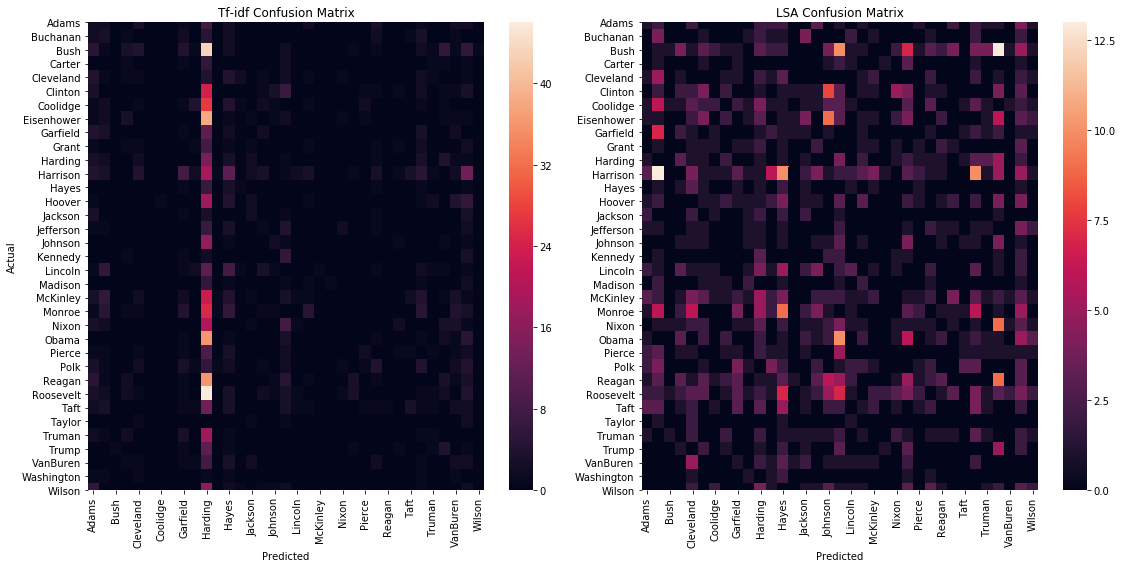

In [53]:
# Specify the classifier
clf = RandomForestClassifier(n_estimators=100,
                             max_depth=3,
                             random_state=42,
                             class_weight='balanced' 
                            )   

# Run model
run_model(clf)

#### The accuracy of both TD-IDF and LSA feaures perform very bad and almost the same. The confusion matrix of TD-IDF predicted Harding as the document source. The LSA idendified most of the president as document source. The class balance parameter was set to balance but it follows the but still follows the class imbalance in the data.

In [54]:
# Use model to get feature importance
feat_importance = clf.fit(X_train_tfidf, Y_train).feature_importances_
features = vectorizer.get_feature_names()

importance_df = pd.DataFrame({'word': vectorizer.get_feature_names(), 'importance': feat_importance})
importance_df.sort_values(by='importance', ascending=False).head(10)

,word,importance
3200,shall,0.013862
1139,duty,0.013454
1780,house,0.013300
2871,recommend,0.012124
2090,lately,0.012076
1048,discharge,0.011153
2315,moderation,0.010791
1929,informed,0.010361
2788,public,0.009410
776,continuance,0.008523


Again, we see 'applause' as the most important word.  This could be throwing off the model because it's effectively a corpus specific stop word.

#### We can see that *shall* is the most important word. This is a *stop word* so we can consider to remove *stop word* cause it has effect on the performance of the model.

#### Logistic Regression

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


TF-IDF Features:
Train accuracy: 0.6139424346448376
Test accuracy: 0.2288202692003167
---------------------------------------------


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LSA Features:
Train accuracy: 0.5653551623976762
Test accuracy: 0.2454473475851148


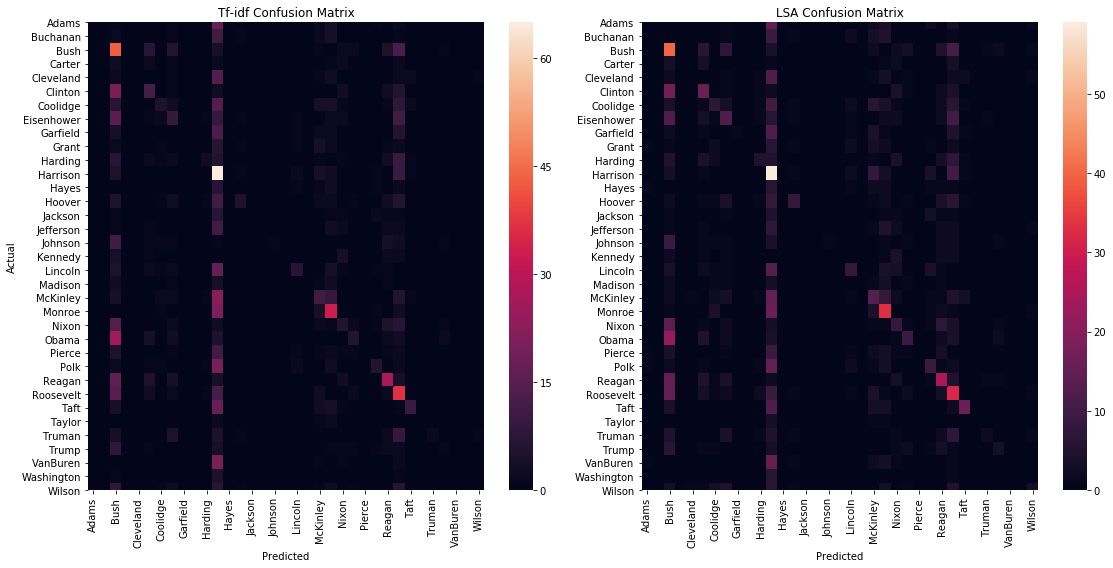

In [55]:
# Specify and run model
clf = LogisticRegression()
run_model(clf)


#### Logistic Regression perform better but it prone to overfitting. Both perform better accuracy in th training data set and bad on the testing data. It still follow the class imbalance and it predicted Harding, Bush, Taft , Nixon, Reagan as the document source. 

#### Support Vector Machine 

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


TF-IDF Features:
Train accuracy: 0.07261684710852918
Test accuracy: 0.0728424386381631
---------------------------------------------


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LSA Features:
Train accuracy: 0.07261684710852918
Test accuracy: 0.0728424386381631


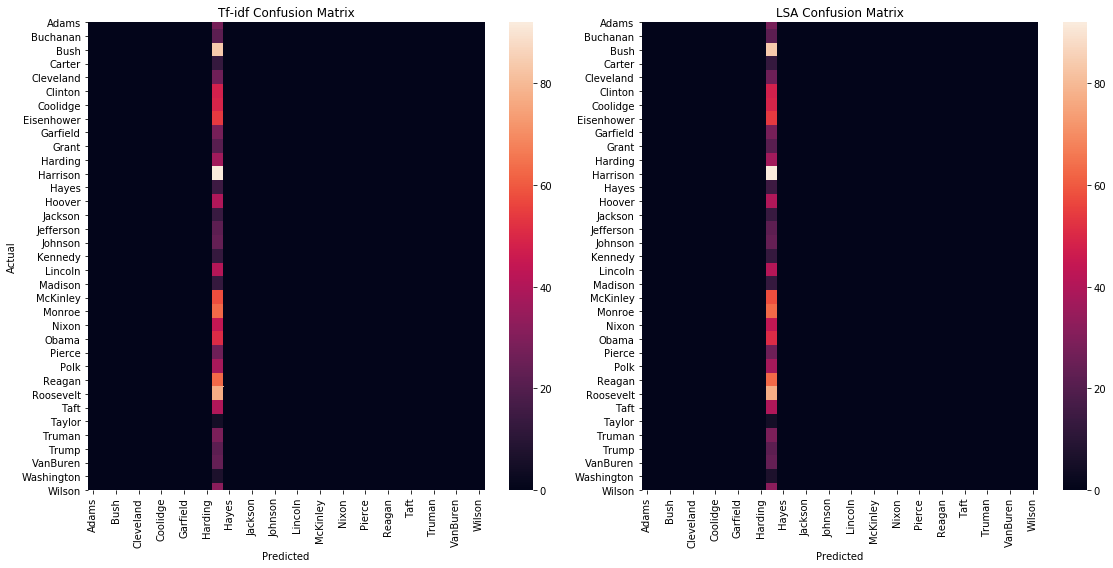

In [56]:
# Specify and run model
clf = SVC()
run_model(clf)

The support vector machine classifier worked terribly for both feature sets. The model predicted exclusively to Harding as the document source.  

<a id='section4'></a>
## Comparing Supervised and Unsupervised Learning for NLP Applications

Based on the three models above, it's clear more work could be done to make a more accurate classifier.  For starters, we could removing corpus specific stop words and address the class imbalance that's manifesting itself our model accuracies.  But the purpose here wasn't to build the best classifier possible (although that would have been a good perk).  Instead, we explored how supervised and unsupervised methods could be applied to natural language processing applications.  

Here's a summary of what we learned:

__Unsupervised:__
* Tf-Idf can be used to detect unique identifier words
* SVD can identify corpus specific stop words (i.e. 'applause'), as well as common phrases (i.e. 'we the people')
* SVD clusters the tf-idf matrix into general themes and sentiments present in the documents.  Sometimes these clusters are meaningful and can shed light on common sentiments.
* We didn't use similarity comparison here because it didn't make much sense for our document size.  However, if the document size was larger, say the full text body for each address, running a similarity analysis could be quite informative.  For example, we could compare the similarity of different presidents, or look at how similarity changes within a president's term.

__Supervised:__
* The utility of supervised methods is more limited and should be used for text classification purposes.  Depending on the model used, additional insights could be gained by looking at feature importance.

## Summary:
### After data processing and applying the corpus of Inauguration addresses to Supervise and Unsupervise NLP.

Data Preprocessing
* Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
* Words that have fewer than 3 characters are removed.
* All stopwords are removed.
* Words are lemmatized - words in third person are changed to first person and verbs in past and future tenses are changed into present.
* Words are stemmed - words are reduced to their root form.
* Bag of Words is used to convert text data into numerical feature vectors w/ fixed size
* TF-IDF(Term Frequency, Inverse Document Frequency)
    - score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents.

### Supervised Learning NLP
* Supervised is more limited and only used for mostly for text classification.  
* Base on the 3 model need more investigation like modeling techniques, making more features that take advantage of the spaCy information (include grammar, phrases, POS, etc), making sentence-level features (number of words, amount of punctuation), or including contextual information (length of previous and next sentences, words repeated from one sentence to the next, etc) help to improve the accuracy.

### Unsupervised Learning NLP
* LSA - relationship between individual words and also useful as a way of creating features to be used in other models.
* Gensim Word2vec
    - LSA creates vector representations of sentences based on the words in them, while word2vec creates representations of individual words, based on the words around them.
   